## Обухов Илья Романович ПИ225
__5 семинар, визуализация данных__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

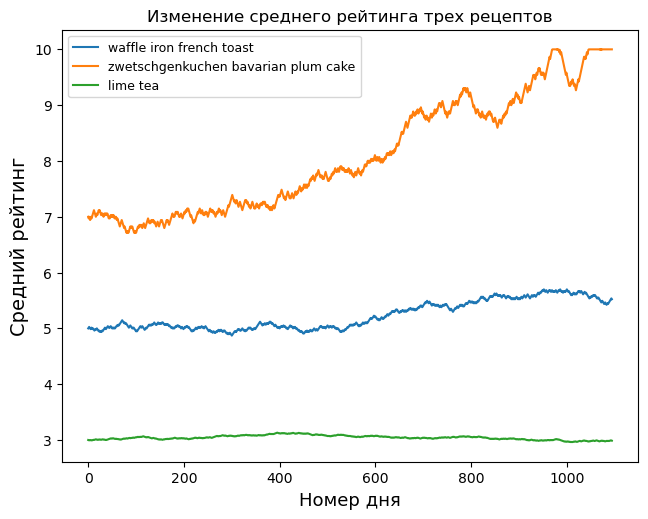

In [10]:
fig = plt.figure()
ratings = np.load('average_ratings.npy')
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
plt.plot(ratings[0], label = 'waffle iron french toast')
plt.plot(ratings[1], label = 'zwetschgenkuchen bavarian plum cake')
plt.plot(ratings[2], label = 'lime tea')
plt.xlabel("Номер дня", fontsize = 13)
plt.ylabel("Средний рейтинг", fontsize=14)
plt.title("Изменение среднего рейтинга трех рецептов")
plt.legend(loc='upper left', fontsize=9)
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


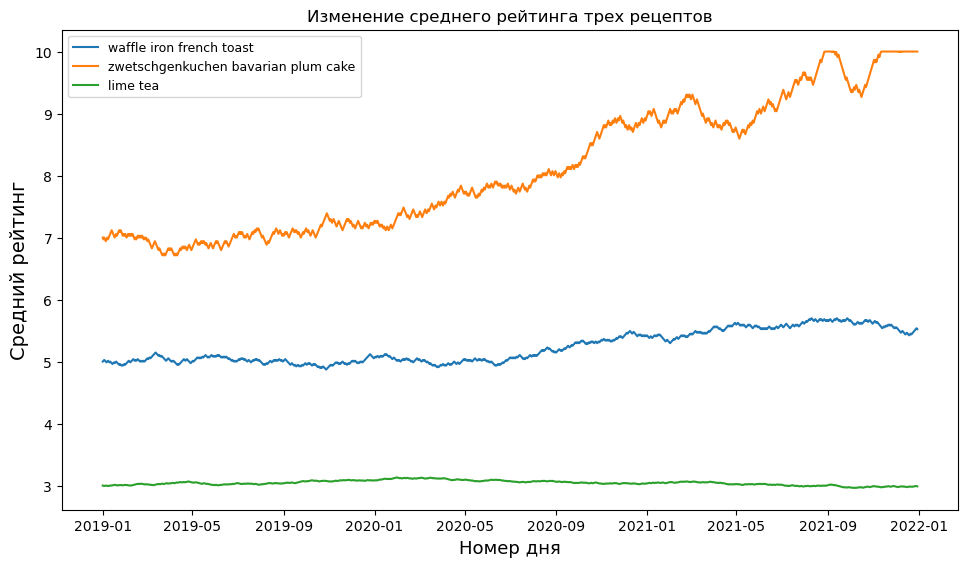

In [4]:
import matplotlib.dates as mdates

fig = plt.figure()

ratings = np.load('average_ratings.npy')

ax = fig.add_axes([0.2, 0.1, 1.4, 1])
start, stop = '01.01.2019', '30.12.2021'
plt.plot(pd.date_range(start, stop), ratings[0], label = 'waffle iron french toast')
plt.plot(pd.date_range(start, stop), ratings[1], label = 'zwetschgenkuchen bavarian plum cake')
plt.plot(pd.date_range(start, stop), ratings[2], label = 'lime tea')

plt.xlabel("Номер дня", fontsize = 13)
plt.ylabel("Средний рейтинг", fontsize=14)
plt.title("Изменение среднего рейтинга трех рецептов")

plt.legend(loc='upper left', fontsize=9)

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

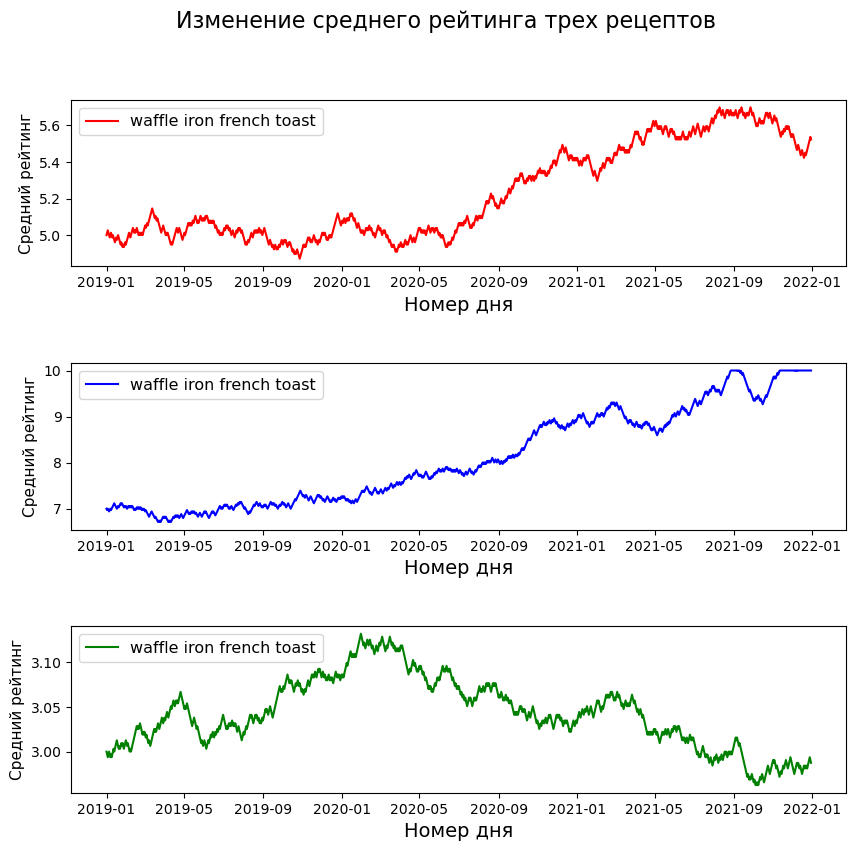

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 9))
fig.subplots_adjust(hspace=0.58)

ratings = np.load('average_ratings.npy')

start, stop = '01.01.2019', '30.12.2021'

axs[0].plot(pd.date_range(start, stop), ratings[0], color='r')
axs[1].plot(pd.date_range(start, stop), ratings[1], color='b')
axs[2].plot(pd.date_range(start, stop), ratings[2], color='g')

fig.suptitle('Изменение среднего рейтинга трех рецептов', fontsize=16)

for ax in axs:
    ax.set_xlabel('Номер дня', fontsize=14)
    ax.set_ylabel('Средний рейтинг', fontsize=11)
    ax.legend(['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], loc='upper left', fontsize=11.5)
    
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


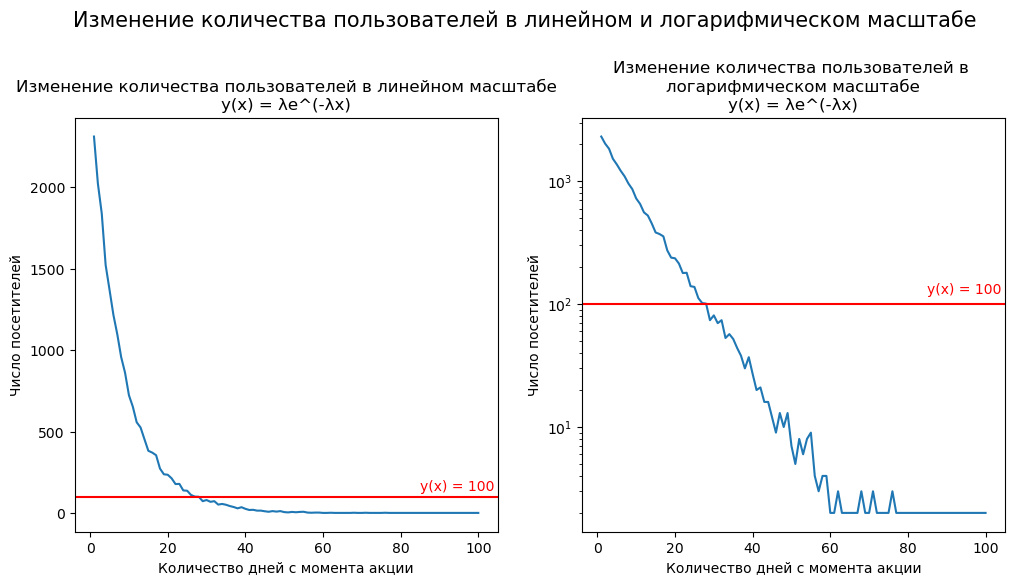

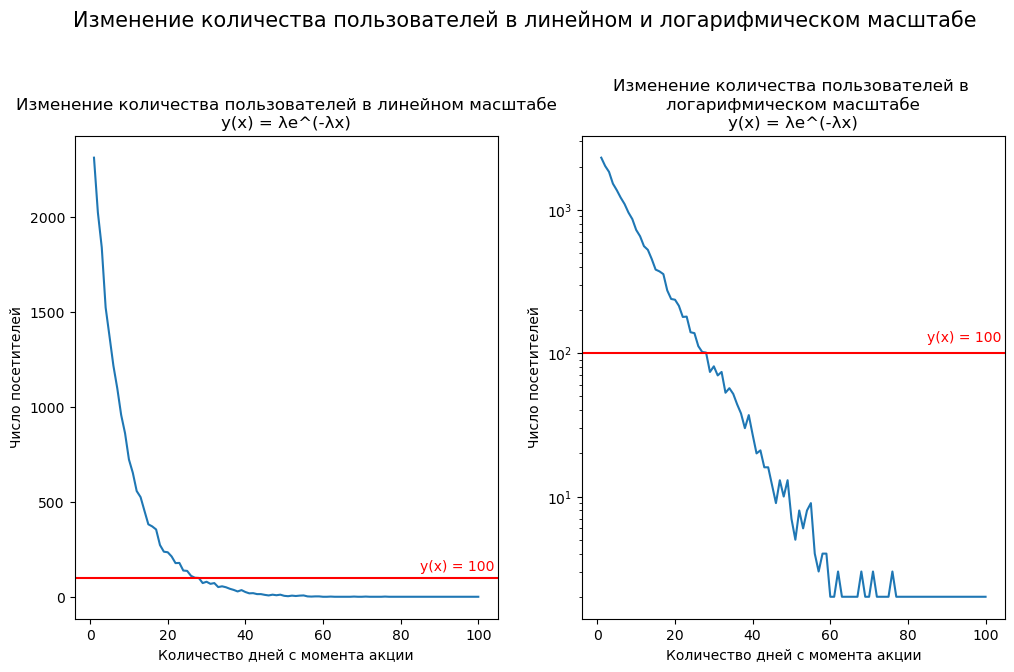

In [182]:
visitors = np.load('visitors.npy')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.subplots_adjust(top=0.8)
axs[0].plot(range(1, len(visitors)+1), visitors)
axs[0].axhline(y=100, color='red')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].set_title('Изменение количества пользователей в линейном масштабе\ny(x) = λe^(-λx)')
axs[0].annotate('y(x) = 100', xy=(85, 139), color='red')
axs[1].semilogy(range(1, len(visitors)+1), visitors)
axs[1].axhline(y=100, color='red')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_title('Изменение количества пользователей в \nлогарифмическом масштабе\ny(x) = λe^(-λx)')
axs[1].annotate('y(x) = 100', xy=(85,121), color='red')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=15)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

visitors = np.load('visitors.npy')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
fig.subplots_adjust(top=0.8) 
axs[0].plot(range(1, len(visitors)+1), visitors)
axs[0].axhline(y=100, color='red')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')
axs[0].set_title('Изменение количества пользователей в линейном масштабе\ny(x) = λe^(-λx)')
axs[0].annotate('y(x) = 100', xy=(85, 139), color='red')

axs[1].semilogy(range(1, len(visitors)+1), visitors)
axs[1].axhline(y=100, color='red')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')
axs[1].set_title('Изменение количества пользователей в \nлогарифмическом масштабе\ny(x) = λe^(-λx)')
axs[1].annotate('y(x) = 100', xy=(85, 121), color='red')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', fontsize=15)
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
reviews = pd.read_csv('reviews_sample (1).csv')
recipes = pd.read_csv('recipes_sample.csv')

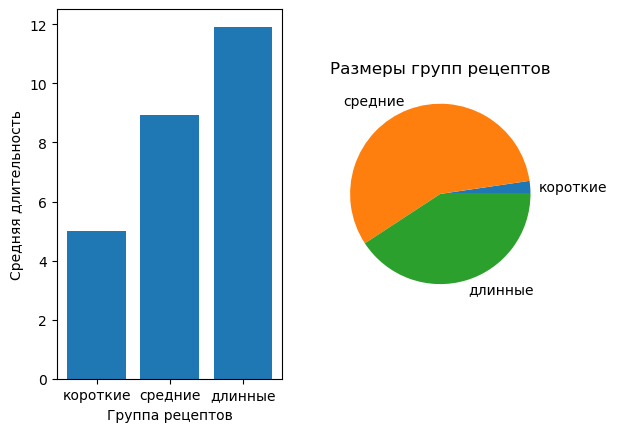

In [100]:
recipes = recipes.dropna(subset=['n_steps'])

short = recipes.loc[recipes['minutes']<5]
avrg = recipes.loc[(recipes['minutes'] > 5) & (recipes['minutes'] < 50)]
long = recipes.loc[recipes['minutes']>=50]

short_mean = short['n_steps'].mean()
short_len = len(short)

avrg_mean = avrg['n_steps'].mean()
avrg_len = len(avrg)

long_mean = long['n_steps'].mean()
long_len = len(long)

lens_names = ['короткие', 'средние', 'длинные']
means = [short_mean, avrg_mean, long_mean]
lens = [short_len, avrg_len, long_len]

plt.subplot(1, 2, 1)
plt.bar(lens_names, means)
plt.xlabel('Группа рецептов')
plt.ylabel('Средняя длительность')


plt.subplot(1, 2, 2)
plt.pie(lens, labels = lens_names)
plt.title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

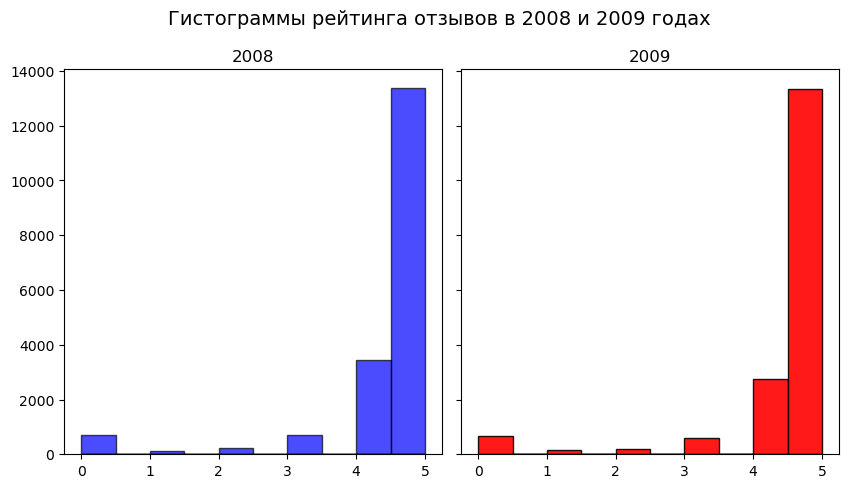

In [139]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')
selected_reviews = reviews.loc[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

selected_reviews[selected_reviews['date'].dt.year == 2008].plot.hist(ax=axs[0], bins=10, range=(0, 5), color='blue', alpha=0.7, edgecolor='black', legend=False).set_ylabel(None)
selected_reviews[selected_reviews['date'].dt.year == 2009].plot.hist(ax=axs[1], bins=10, range=(0, 5), color='red', alpha=0.9, edgecolor='black', legend=False)

axs[0].set_title('2008')
axs[1].set_title('2009')

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14, y=1)
plt.subplots_adjust(wspace=0.05)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

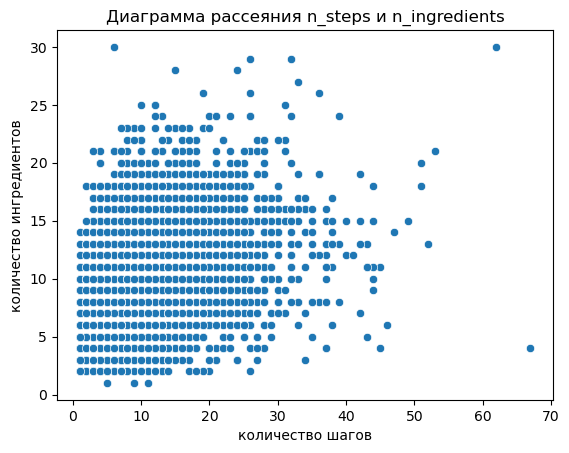

In [186]:
import seaborn as sns
sns.scatterplot(x='n_steps', y='n_ingredients', data=recipes)
plt.xlabel('количество шагов')
plt.ylabel('количество ингредиентов')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

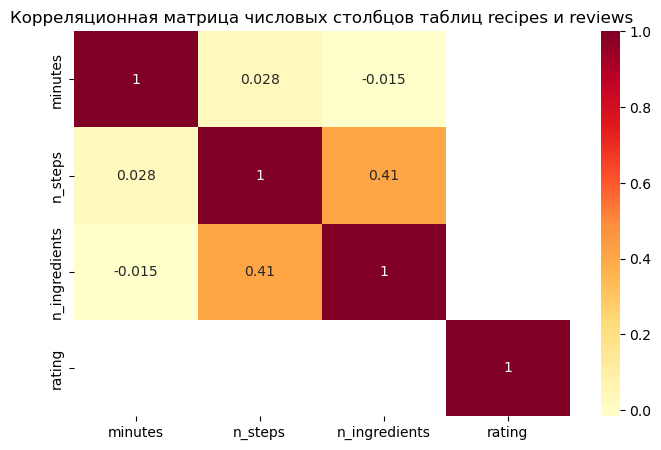

In [204]:
result = pd.concat([recipes, reviews])
cols = ["minutes", "n_steps", "n_ingredients", 'rating']
data = result[cols]
matrix = data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()